# The Naive Bayes Method

- The *Naive Bayes* Method is a generative classification method
- The Naive Bayes method makes the simple-minded assumption that all features are independent.
-  For each class $c_i$ in the response variable, we estimate the (one-variable) distribution of each feature
-  We also estimate the prior probability of each class. This information is either given, or estimated from the response variable.

Once we have this information the model is learned, and we are  ready to predict the class probability of a new item $\mathbf{x}_{\text{new}}$. Here are the steps:

1. We need $\Pr[y=c_i\mid \mathbf{x}_{\text{new}}]$.
2. We use Bayes theorem
   $$
   \begin{aligned}
   \Pr[y=c_i\mid \mathbf{x}_{\text{new}}] &\propto f\bigl(\mathbf{x}_{\text{new}}\bigr) \Pr_{\text{pri}}(y=c_i)\\
    &= f\bigl(x_1\bigr) f\bigl(x_2\bigr) \dots f\bigl(x_d\bigr) \Pr_{\text{pri}}(y=c_i)
   \end{aligned}
   $$
   where the symbol '$\propto$' means 'proportional to'. And $f(\mathbf{x})$ the pdf of $\mathbf{x}$.
3. The "niaveness" comes from the assumption that $f(x_1,x_2,\dots,x_d) = f_1(x_1)\times\dots\times f_d(x_d)$, that is we assume that the input variables $x_i$ are independent and so, their joint distribution equals the product of their marginal distributions.
4. Using Bayes decision rule, we assign to $\mathbf{x}_{\text{new}}$ the class $c_i$ that has the largest value above. Note, that for all estimated probabilities the denominators are the same. So we need not calculate them to figure out which class has the highest estimated probability.

We use these principles on a number of examples. In Scikit-learn, `naive_bayes` is the main naive Bayes classifier module. The specific naive Bayes methods are `naive_bayes.BernoulliNB`, `naive_bayes.GaussianNB` and `naive_bayes.CategoricalNB`. In Scikit-learn we can use only one type of distribution for each model. However, after a simple example, we show how to train using different distributions for different groups of variables.

# A simple artificial text classification problem

The following script reads a file called "article.csv", and runs the
naive Bayes method to classify an article based on the keywords.

The file contains data from newspaper articles and classifies them as 
whether they are about the US presidential election. The target variable is "political" and has the word "yes" if the article is about the election, and "no" if it is not. Under each keyword, there is the word "True" or "False" indicating whether that 
word occurred in the article or not.

The Naive Bayes method use is called `BernoulliNB` which treats each feature as a binary item and uses sample proportion to estimate class conditional distributions.


In [2]:
import pandas as pd
import sklearn.naive_bayes as skb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_curve, RocCurveDisplay,roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Change dir to the actual location of the file in your computer:

dir="C:/Users/alizadeh/PythonNotebooks/AMLpythonNoteBooks/" # On Windows
#dir="/home/farid/Dropbox/PythonNotebooks/AMLpythonNoteBooks/" # On Linux
articleData=pd.read_csv(dir+"article.csv")
display(articleData)

,Trump,Biden,Harris,Kamala,debate,poll,Pennsylvania,Wisconsin,Michigan,Arizona,...,Olympics,Ronaldo,inflation,Middle_East,unemployment,weather,AI,Germany,China,political
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,no
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,no
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,yes
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,no
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,no
3496,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,yes
3497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,no
3498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,no


## Naive Bayes with Bernoulli distribution
Each keyword is treated as a Bernoulli random variable where if the keyword exists in the text, it is registered as one, and if not, it is registered as zero. For each class the parameter $p$, the proportion of ones is estimated from sample proportion. 

Number of mislabeled points out of a total 700 points : 200
The confusion matrix:
 [[331  67]
 [133 169]]
              precision    recall  f1-score   support

       False       0.71      0.83      0.77       398
        True       0.72      0.56      0.63       302

    accuracy                           0.71       700
   macro avg       0.71      0.70      0.70       700
weighted avg       0.71      0.71      0.71       700



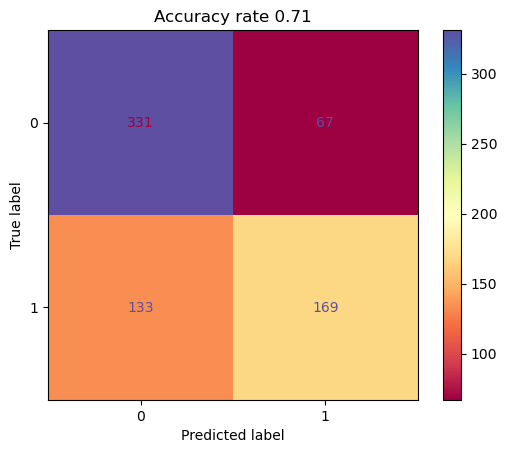

In [3]:
# Turn the data into 0-1
y=pd.get_dummies(articleData['political'])['yes']
X=articleData[articleData.columns[:-1]] #Get all columns other than the target which is in the last column

#np.random.seed(12) # to get a consistent result, Comment out if not needed

# Split data into train and test sets, here 20% are random set aside in the test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#deifne the model, fit it to data and then predict on the test set:
#cnb = skb.CategoricalNB()
cnb = skb.BernoulliNB()
model=cnb.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(y_test != y_pred).sum()}")

C=confusion_matrix(y_test, y_pred)
print("The confusion matrix:\n", C)
print(classification_report(y_test, y_pred))

#sns.heatmap(C, cmap="Spectral")
ConfusionMatrixDisplay(C).plot(cmap="Spectral")
plt.title(f"Accuracy rate {(C[0,0]+C[1,1])/(np.sum(C)):3.2}")
plt.show()

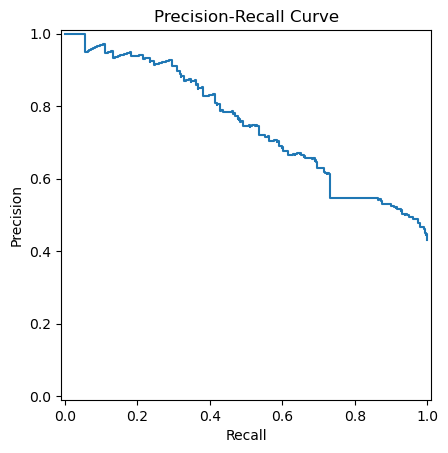

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


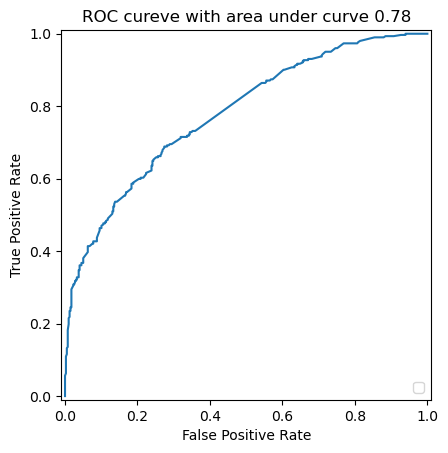

In [6]:
y_prob=cnb.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

precDisplay=PrecisionRecallDisplay(precision, recall).plot()
plt.title("Precision-Recall Curve")
plt.show()
rocDisplay=RocCurveDisplay(fpr=fpr,tpr=tpr).plot()
plt.title(f"ROC cureve with area under curve {roc_auc_score(y_test,y_prob):3.2}")
#plt.legend()
plt.show()


# Using Naive Bayes to Build a Spam filter

## Reading and loading the `Spambase` dataset 

First read the data available in ``openml`` dataset. 

In [11]:
from sklearn.datasets import fetch_openml
dat = fetch_openml('spambase', version=1,parser='auto')

### Join data and target columns in the data frame

Since the target and input variables are given separately, we use Panda's library function `join` to add the target to the data frame:

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

spamDataDf = dat['data'].join(pd.DataFrame(np.array(dat["target"]),columns=["Spam"]))

display(spamDataDf)
#np.array(spamData['target'])
#spamData['data'].join(pd.DataFrame(np.array(spamData["target"]),columns=["Spam"]))

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


### Split into train and test sets:

We split the data into train and test sets. We also going to split the columns into two groups.

We are going to experiment with two approaches. First, the data on key words and symbols are given in the form of frequency in the the data. We can treat these features as continuous and attach some distribution to them, for example, the normal distribution. Another approach is to treat the appearance of these keywords as a categorical binary, which is either 'yes' (if the word appears in the email) or 'no' (if the word does not appear in the email.) 

The second set of data are by nature numerical. The last three input variables deal with the length of capital letter runs. We treat these values as numerical and assume they follow the normal distribution for each class. We need to estimate the mean and variance from the data.

Therefore, we also split the training and the test sets along the columns into two groups. One contains features that are going to be treated as categorical and binary. This data is stored in the ``spamBin_train`` and `spamBin_test` data frames. These are the first 54 columns. The other contains features that are going to be treated as numerical. These are the last three features and they are going to be stored in the `spamData1_numTrain` and `spamData1_numTest` data frames.

In [17]:
from sklearn import naive_bayes as nb
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay,\
    precision_recall_curve, roc_curve,roc_auc_score,PrecisionRecallDisplay,RocCurveDisplay
from sklearn.model_selection import train_test_split

spamDat_train, spamDat_test, y_train, y_test=train_test_split(\
    spamDataDf[spamDataDf.columns[:-1]],spamDataDf[spamDataDf.columns[-1]], test_size=0.1)


## The Bernoulli Naive Bayes Model

In this model, we only look at the first 54 columns. Furthermore, we treat the input values as zero, if the corresponding keyword does not appear in the email, and one if does (regardles of how many times.) 

We first transform these 54 columns into binary and then apply the `BernoulliNB` function on them:

Report for the first 54 binary features only, with Bernoulli Naive Bayes:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       272
           1       0.90      0.82      0.86       189

    accuracy                           0.89       461
   macro avg       0.89      0.88      0.88       461
weighted avg       0.89      0.89      0.89       461



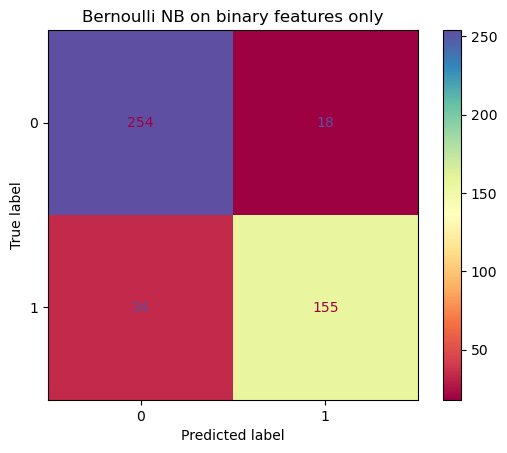

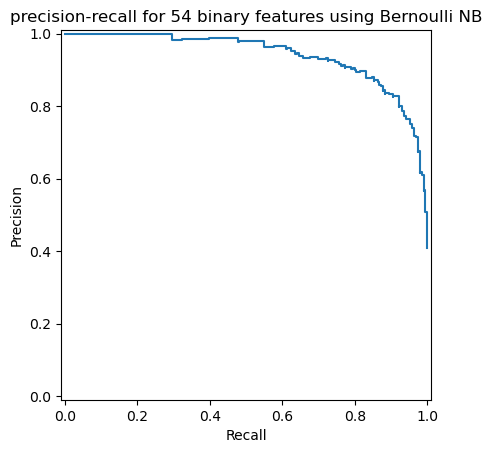

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


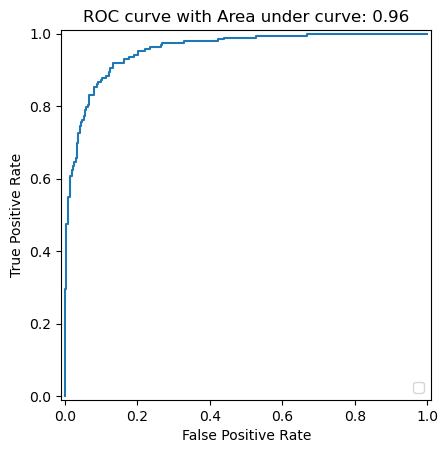

In [47]:
spamData1_binTrain=spamDat_train[spamDat_train.columns[:54]] # Pick only the first 54 columns
spamData1_binTest=spamDat_test[spamDat_test.columns[:54]]

# We actually need not do any transformation on the data. BernoulliNB treats all nonzero values as one:
bnbModel=nb.BernoulliNB(alpha=1.0,force_alpha=True,binarize=1.e-5)
bnbModel.fit(spamData1_binTrain, y_train)
#y_pred=gnbModel.predict(spamData1)
y_predBin=bnbModel.predict(spamData1_binTest) # returns yes or no for spam
y_predBinP=bnbModel.predict_log_proba(spamData1_binTest) # returns the the log of probability of being yes or no

print("Report for the first 54 binary features only, with Bernoulli Naive Bayes:")
print(classification_report(y_test,y_predBin))

CBin = confusion_matrix(y_test,y_predBin)
ConfusionMatrixDisplay(CBin).plot(cmap="Spectral")
plt.title("Bernoulli NB on binary features only")
plt.show()

#y_test contains 0's and 1's as str type. We need to turn them into int type:
y_true=[int(test) for test in y_test] #needed for function below:
precision, recall, thresholds=precision_recall_curve(y_true,y_predBinP[:,1])
PrecisionRecallDisplay(precision,recall).plot()
plt.title("precision-recall for 54 binary features using Bernoulli NB")
plt.show()

fpr, tpr, _ = roc_curve(y_true, y_predBinP[:,1])
rocDisplay=RocCurveDisplay(fpr=fpr,tpr=tpr).plot()
plt.title(f"ROC curve with Area under curve: {roc_auc_score(y_true,y_predBinP[:,1]):3.2f}")
plt.show()

## The Gaussian Naive Bayes Model:

We now look only at the last three input variables which are numerical by nature. We assume the underlying class probabilities follow the normal distribution. The `GaussianNB` function treats these variables as normal, estimates their mean and variance for each class (here 'spam' or 'no spam') and uses the normal pdf values, along with the prior probabilities, to decide whether frequency of capital letter runs corresponds to a spam email or not.

Report for last three numerical features only with Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.65      0.98      0.78       272
           1       0.90      0.23      0.36       189

    accuracy                           0.67       461
   macro avg       0.77      0.60      0.57       461
weighted avg       0.75      0.67      0.61       461



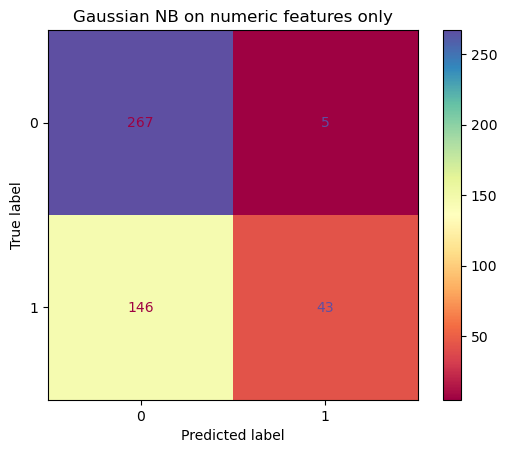

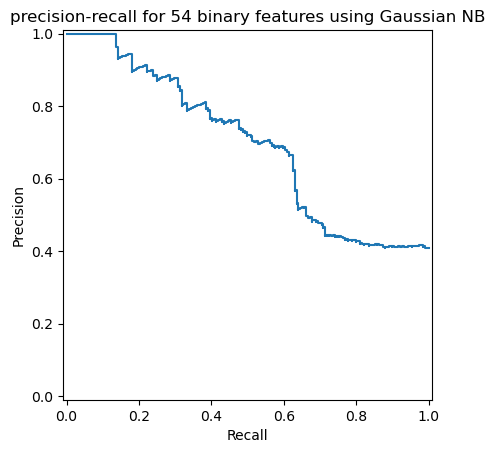

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


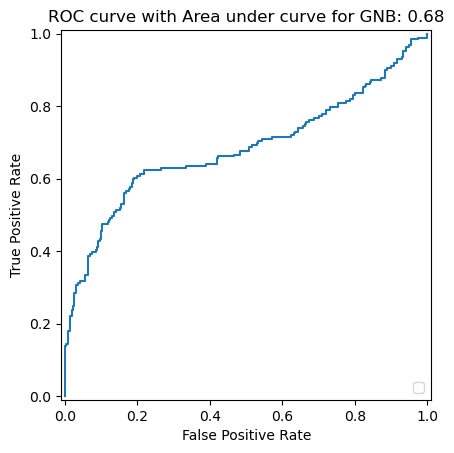

In [58]:
spamData1_numTrain=spamDat_train[spamDat_train.columns[-4:]]
spamData1_numTest=spamDat_test[spamDat_test.columns[-4:]]

gnbModel=nb.GaussianNB()
#gnbModel.fit(spamData1,spamData["Spam"])
gnbModel.fit(spamData1_numTrain, y_train)
#y_pred=gnbModel.predict(spamData1)
y_predNum=gnbModel.predict(spamData1_numTest)
y_predNumP=gnbModel.predict_proba(spamData1_numTest)

print("Report for last three numerical features only with Gaussian Naive Bayes:")
print(classification_report(y_test,y_predNum))
Cnum = confusion_matrix(y_test,y_predNum)
ConfusionMatrixDisplay(Cnum).plot(cmap="Spectral")
plt.title("Gaussian NB on numeric features only")

y_true=[int(test) for test in y_test]
precision, recall, thresholds=precision_recall_curve(y_true,y_predNumP[:,1])
PrecisionRecallDisplay(precision,recall).plot()
plt.title("precision-recall for 54 binary features using Gaussian NB")
plt.show()

fpr, tpr, _ = roc_curve(y_true, y_predNumP[:,1])
rocDisplay=RocCurveDisplay(fpr=fpr,tpr=tpr).plot()
plt.title(f"ROC curve with Area under curve for GNB: {roc_auc_score(y_true,y_predNumP[:,1]):3.2f}")
plt.show()

## Using Gaussian on all features, assuming all input variables are numerical

Since just looking at the last three variables did not yield a very good result, we now include all variables, and treat them as numerical with Gaussian (normal) distribution:

Report for all features only with Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.94      0.72      0.82       272
           1       0.70      0.94      0.80       189

    accuracy                           0.81       461
   macro avg       0.82      0.83      0.81       461
weighted avg       0.84      0.81      0.81       461



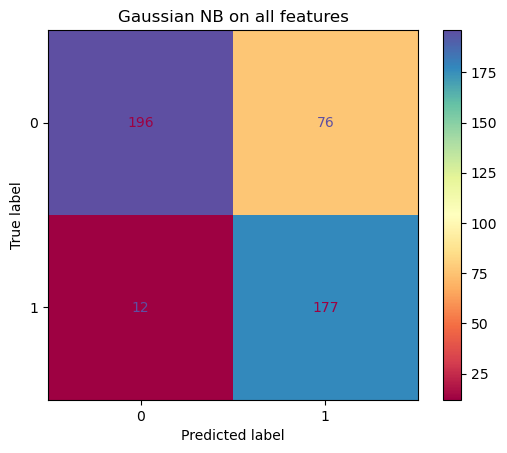

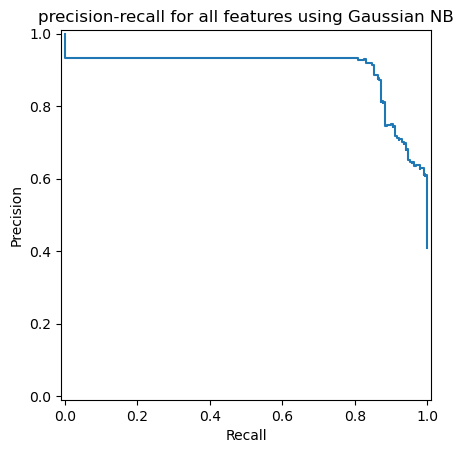

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


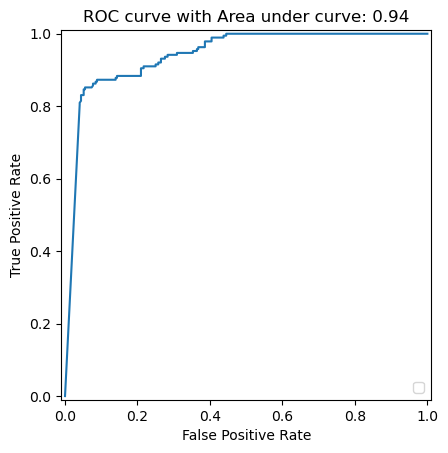

In [53]:
gnbModel2 = nb.GaussianNB()
gnbModel2.fit(spamDat_train,y_train)

y_predAll = gnbModel2.predict(spamDat_test)
y_predAllP = gnbModel2.predict_proba(spamDat_test)

print("Report for all features only with Gaussian Naive Bayes:")
print(classification_report(y_test,y_predAll))
Call = confusion_matrix(y_test,y_predAll)
ConfusionMatrixDisplay(Call).plot(cmap="Spectral")
plt.title("Gaussian NB on all features")

y_true=[int(test) for test in y_test]
precision, recall, thresholds=precision_recall_curve(y_true,y_predAllP[:,1])
PrecisionRecallDisplay(precision,recall).plot()
plt.title("precision-recall for all features using Gaussian NB")
plt.show()

fpr, tpr, _ = roc_curve(y_true, y_predAllP[:,1])
rocDisplay=RocCurveDisplay(fpr=fpr,tpr=tpr).plot()
plt.title(f"ROC curve with Area under curve: {roc_auc_score(y_true,y_predAllP[:,1]):3.2f}")
plt.show()

## Bernoulli NB on binary features, and Gaussian NB on numerical features

When we used only the first 54 input variables, treated them as binary, we achieved an accuracy of 89%. When we used all variables and treated them as Gaussian, we achieved an accuracy of 81%. We now try another approach: treating the first 54 as binary, and the last three as numerical following the normal distribution. Unfortunately, Scikit-Learn's Naive Bayes module does not allow using different distributions for different variables. 

We can overcome this problem by separately treating the first 54 as binary, the last three as Gaussian, and then combine their class probability estimates. 

We can simply multiply the class probabilities produced by each method. However, there are two issues that need to be addressed.

First, in the Naive Bayes method the class probabilities are estimated by the individual features' probabilities multiplied by the the prior. Each method multiplies by the prior once. So by multiplying the two probabilities, we end up multiplying by the prior twice. So we need to divide by the prior once to compensate for this double counting. 

Second, instead of probabilities, we work with logarithm of probabilities. When there are even a moderate number of features multiplying a lot of numbers between zero and one, may result in such small number that they cannot be represented properly in the floating point representation in computers. The logarithm, however, will be a moderate size number and can be represented without a problem, even if there are hundreds of features. 

When using logarithms, we need to *subtract* the extra double counting  of the logarithm of the prior.

With these points taken into account, we can now go ahead with using the Bernoulli distribution for the first 53 variables, and the Gaussian distribution for the remaining three:

Report for the first 54 binary features using Bernoulli Naive Bayes, and the last three numeric features using Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       287
           1       0.93      0.66      0.77       174

    accuracy                           0.85       461
   macro avg       0.88      0.81      0.83       461
weighted avg       0.87      0.85      0.85       461



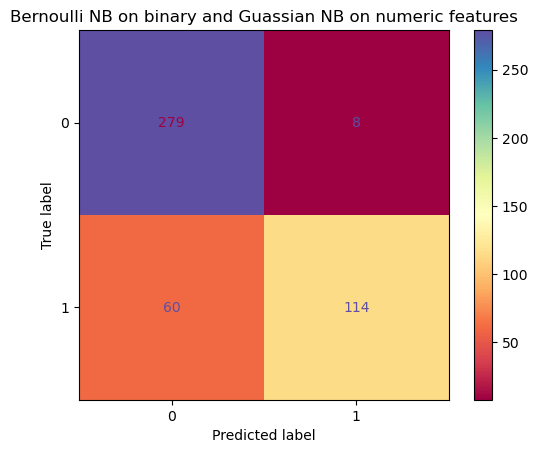

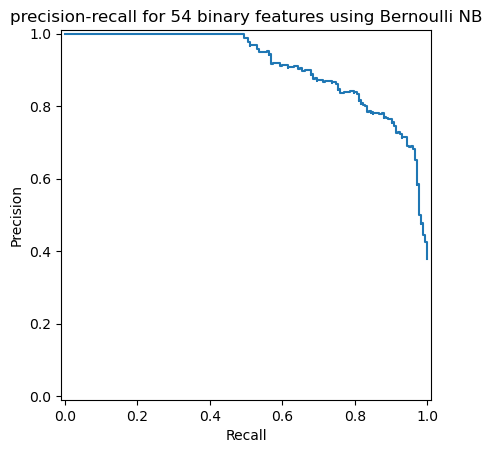

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


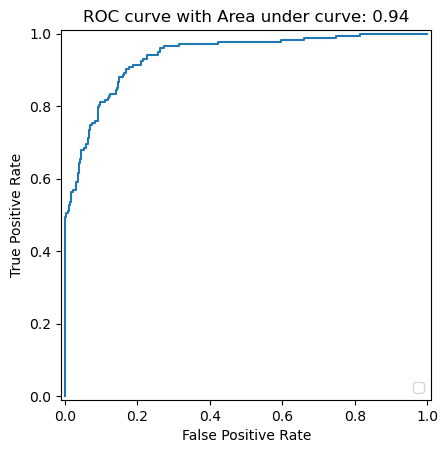

In [71]:
newPredP=bnbModel.predict_proba(spamData1_binTest)*gnbModel.predict_proba(spamData1_numTest)
newPredP = newPredP / gnbModel.class_prior_
newPredP[:,0]=newPredP[:,0]/np.sum(newPredP, axis=1)
newPredP[:,1]=newPredP[:,1]/np.sum(newPredP, axis=1)

#Using logarithm of probabilities instead:
#newPredPLog=bnbModel.predict_log_proba(spamData1_binTest) +gnbModel.predict_log_proba(spamData1_numTest)-\
#    bnbModel.class_log_prior_
#newPredP=np.exp(newPredPLog)
#newPredP[:,0]=newPredP[:,0]/np.sum(newPredP, axis=1)
#newPredP[:,1]=newPredP[:,1]/np.sum(newPredP, axis=1)
#print(np.sum(newPredP, axis=1))
#print(newPredP.shape,newPredP)

newPred=['1' if newPredP[i,0]<0.5 else '0' for i in range(len(spamData1_numTest))]
print("Report for the first 54 binary features using Bernoulli Naive Bayes, and the last three numeric features using Gaussian Naive Bayes:")

print(classification_report(y_test,newPred))
ConfusionMatrixDisplay(confusion_matrix(y_test,newPred)).plot(cmap="Spectral")
plt.title("Bernoulli NB on binary and Guassian NB on numeric features")

y_true=[int(test) for test in y_test]
precision, recall, thresholds=precision_recall_curve(y_true,newPredP[:,1])
PrecisionRecallDisplay(precision,recall).plot()
plt.title("precision-recall for 54 binary features using Bernoulli NB")
plt.show()

fpr, tpr, _ = roc_curve(y_true, newPredP[:,1])
rocDisplay=RocCurveDisplay(fpr=fpr,tpr=tpr).plot()
plt.title(f"ROC curve with Area under curve: {roc_auc_score(y_true,newPredP[:,1]):3.2f}")
plt.show()

# Naive Bayes on the original binary digit classifiation

This file looks at the original  NIST digit data. Each digit is represented by a $32\times 32$ matrix of zeros and ones.

I have downloaded the original compressed file from the UCI site
https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/

and uncompressed and left the training set in a file called 'optdigits-orig.tra' and the test set in a file called 'optdigits-orig.wdep'. 

The function `readDigits` scans these files and extracts the 0-1 matrices along with each digit's label and puts it in X_train, y_train, X_test and y_test  arrays.

X_train01 shape: (1934, 1024), y_train01 shape: 1934
X_test01 shape: (943, 1024), y_test01 shape: 943


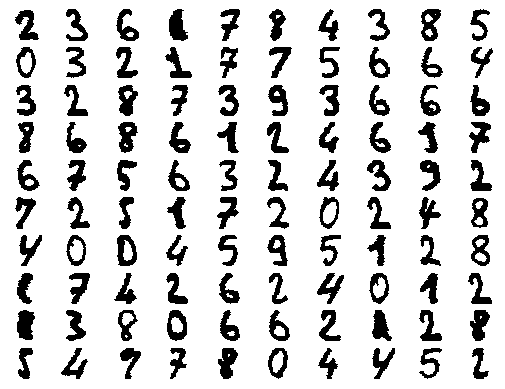

In [46]:
def readDigits(aFile):
    """
    Read the train or test data fromm the original 0-1 digits data from the UCO site
    The digits are 32x32 0-1 matrices. some lines contain a single digit 
    rpresenting the lable, otherwise there are 32 lines each containing 32
    0's or 1's. (Study the input file carefully)
    
    output is a one-dimensional "flattened" table
    
    @author: Farid Alizadeh
    """

    ytrain=[]
    ll,X=[],[]
    # Skip the first 21 lines
    for i in range(21):
        aFile.readline()

    #count=0
    while True:
        l=aFile.readline()
        if not l:  #if there is a blank line or nothing read it's EOF
            break
        if len(l)==3:  # if len= 3 we get " 0\n" or other digits, then this is the y label
            ytrain.append(int(l[1])) #Turn to integer and add to y
            # Now turn the list of 0-1 characters into 0-1 int and put in X
            X.append([int(ll[i][j]) for i in range(32) for j in range(32)])
            ll=[]
            #count=0
            continue
        # Turn the string to a list of charcaters
        ll.append(list(l)[0:32])
        #count+=1
    # Turn the list X into a matrix Xtrain and output Xtrain and ytrain
    Xtrain=np.zeros((len(X),len(X[0])))
    Xtrain[0:,0:]=X
    aFile.close()

    return Xtrain, ytrain


#dir2="C://cygwin64/home//alizadeh/Dropbox/CLASSES/AlgorLearnTheory/Pycode/"
dir2="/home/farid/Dropbox/CLASSES/AlgorLearnTheory/Pycode/"
X_train01, y_train01=readDigits(open(dir2+'optdigits-orig.tra','r')) # read training set

X_test01,y_test01=readDigits(open(dir2+'optdigits-orig.wdep','r')) #read test set

print(f"X_train01 shape: {X_train01.shape}, y_train01 shape: {len(y_train01)}")
print(f"X_test01 shape: {X_test01.shape}, y_test01 shape: {len(y_test01)}")

# Uncomment the following to see some of the digits
##view the digits
m0=10
ran=np.random.randint(0,X_train01.shape[0],(m0,m0))
fig0, ax0 = plt.subplots(m0,m0)
for i in range(m0):
    for j in range(m0):
        ax0[i,j].imshow(X_train01[ran[i,j]].reshape((32,32)),cmap='binary')
        ax0[i,j].axis('off')
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import sklearn.naive_bayes as skb

In [50]:
bnb=skb.BernoulliNB()
bnb.fit(X_train01,y_train01)
y_pred_bnb=bnb.predict(X_test01)
y_predP_bnb=bnb.predict_proba(X_test01)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.94      0.87      0.91        94
           2       0.98      0.91      0.94        93
           3       0.94      0.89      0.91       105
           4       0.95      0.93      0.94        87
           5       0.97      0.84      0.90        81
           6       0.96      0.99      0.97        95
           7       0.91      0.94      0.93        90
           8       0.89      0.95      0.92       109
           9       0.73      0.89      0.80        89

    accuracy                           0.92       943
   macro avg       0.93      0.92      0.92       943
weighted avg       0.93      0.92      0.92       943

The confusion matrix:
 [[ 99   0   0   0   1   0   0   0   0   0]
 [  0  82   1   0   1   0   1   0   2   7]
 [  0   0  85   0   0   0   1   1   5   1]
 [  0   0   1  93   0   2   0   1   3   5]
 [  0   0   0   0  81   0   1   3   1   1]
 [ 

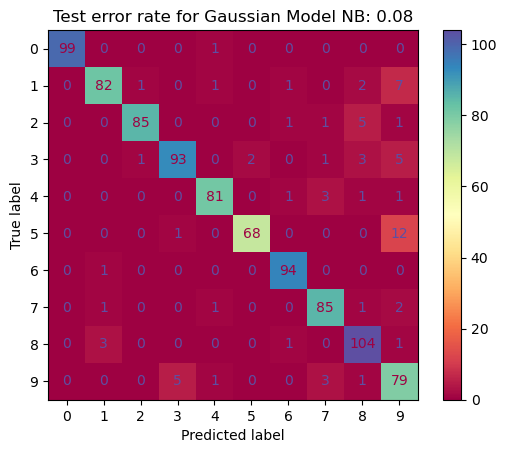

In [52]:
C0=confusion_matrix(y_test01, y_pred_bnb)
print(classification_report(y_test01,y_pred_bnb))
print("The confusion matrix:\n", C0)
errRate0=1.-sum(np.diag(C0))/C0.sum()
ConfusionMatrixDisplay(C0).plot(cmap="Spectral")
plt.title(f"Test error rate for Gaussian Model NB: {errRate0:.2f}")
plt.show()

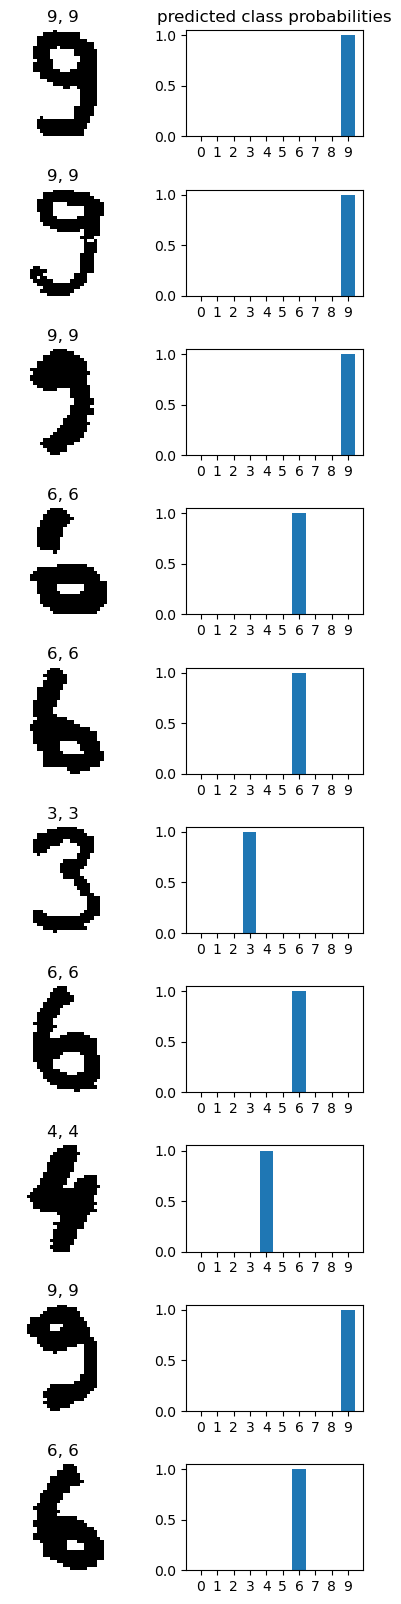

In [54]:
m0=10
ran0=np.random.randint(0,X_test01.shape[0],m0)
fig0, ax0 = plt.subplots(m0,2)
fig0.set_size_inches(5,2*m0)
plt.subplots_adjust(hspace=0.5)
ax0[0,1].set_title("predicted class probabilities")
for i in range(m0):
    ax0[i,0].imshow(X_test01[ran0[i]].reshape((32,32)),cmap='binary')
    ax0[i,0].axis('off')
    ax0[i,0].set_title(f"{y_test01[ran0[i]]}, {y_pred_bnb[ran0[i]]}")
    ax0[i,1].bar(height=y_predP_bnb[ran0[i]],x=range(10))
    ax0[i,1].set_xticks(range(10))


# Applying NB with various methods on the MNIST data

The MNIST data is another very popular hand-written digits set with tens of thousands of samples, each with a 28$\times$28 pixel map. Each pixel is a number between 0 and 256, indicating 256 gray levels. The data can be loaded through `fetch_openml` module in `sklearn`. 

We will try three ways of treating the 256 gray levels:
1. In one approach we treat these numbers as numerical and assume that each pixel is for each class of digit is normally distributed. So we only need to estimate the mean and variance parameters.
2. In another approach we can treat these levels as categorical with 254 classes.
3. In a third approach we treat these pixel intensities as zero or nonzero.

All three methods of estimating the distribution of the gray scale pixels are used below. See and compare the results:

In [20]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', version=1, parser='auto')

## First Read the data
and split into training and test sets:

In [24]:
#print("mnist keys:\n", mnist.keys())
#print(mnist.DESCR) #Gives a description of mnist data
#input('Hit Enter when done reading')
X,y=mnist["data"], mnist["target"]

# split into train and test sets:
X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = train_test_split(X[:40000],y[:40000],test_size=0.2,random_state=None)

## class distribution of pixels: Gaussian
First we examine the Gaussian approach for Naive Bayes. Each pixel's class distribution is normal and the mean and variance are estimated from sample mean and sample variance of data.

Number of mislabeled points out of a total 8000 points: 3492
              precision    recall  f1-score   support

           0       0.69      0.91      0.79       764
           1       0.76      0.96      0.85       897
           2       0.86      0.30      0.44       814
           3       0.78      0.34      0.48       857
           4       0.77      0.14      0.24       749
           5       0.66      0.05      0.09       747
           6       0.66      0.93      0.77       790
           7       0.89      0.34      0.49       819
           8       0.30      0.67      0.41       772
           9       0.40      0.95      0.57       791

    accuracy                           0.56      8000
   macro avg       0.68      0.56      0.51      8000
weighted avg       0.68      0.56      0.52      8000

The confusion matrix:
 [[696   1   4   4   2   1  23   2  23   8]
 [  0 857   2   6   1   0   7   1  17   6]
 [103  25 241  42   4   4 187   5 196   7]
 [ 59  59  11 292   1   1  5

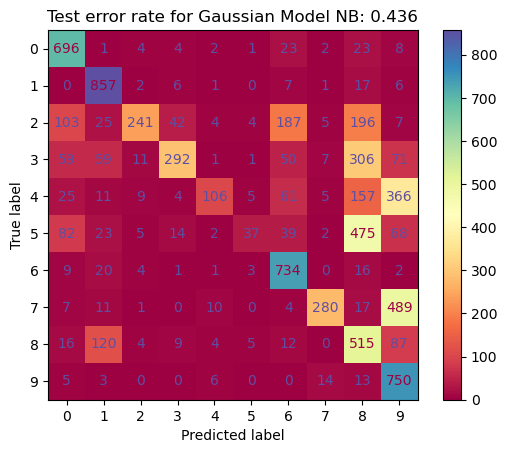

Error rate for Gaussian Model NB: 0.436


In [27]:
gnb = skb.GaussianNB()

nbModel=gnb.fit(X_train_mnist, y_train_mnist)

y_pred_gnb=nbModel.predict(X_test_mnist)

print(f"Number of mislabeled points out of a total {X_test_mnist.shape[0]} points: {(y_test_mnist != y_pred_gnb).sum()}")

C_gnb=confusion_matrix(y_test_mnist, y_pred_gnb)
print(classification_report(y_test_mnist,y_pred_gnb))
print("The confusion matrix:\n", C_gnb)
errRate_gnb=1.-sum(np.diag(C_gnb))/C_gnb.sum()
ConfusionMatrixDisplay(C_gnb).plot(cmap="Spectral")
plt.title(f"Test error rate for Gaussian Model NB: {errRate_gnb:.3f}")
plt.show()

print(f"Error rate for Gaussian Model NB: {errRate_gnb:.3f}")

Show some test images and the prediction on it

Text(0.5, 1.0, 'Predicted probabilites')

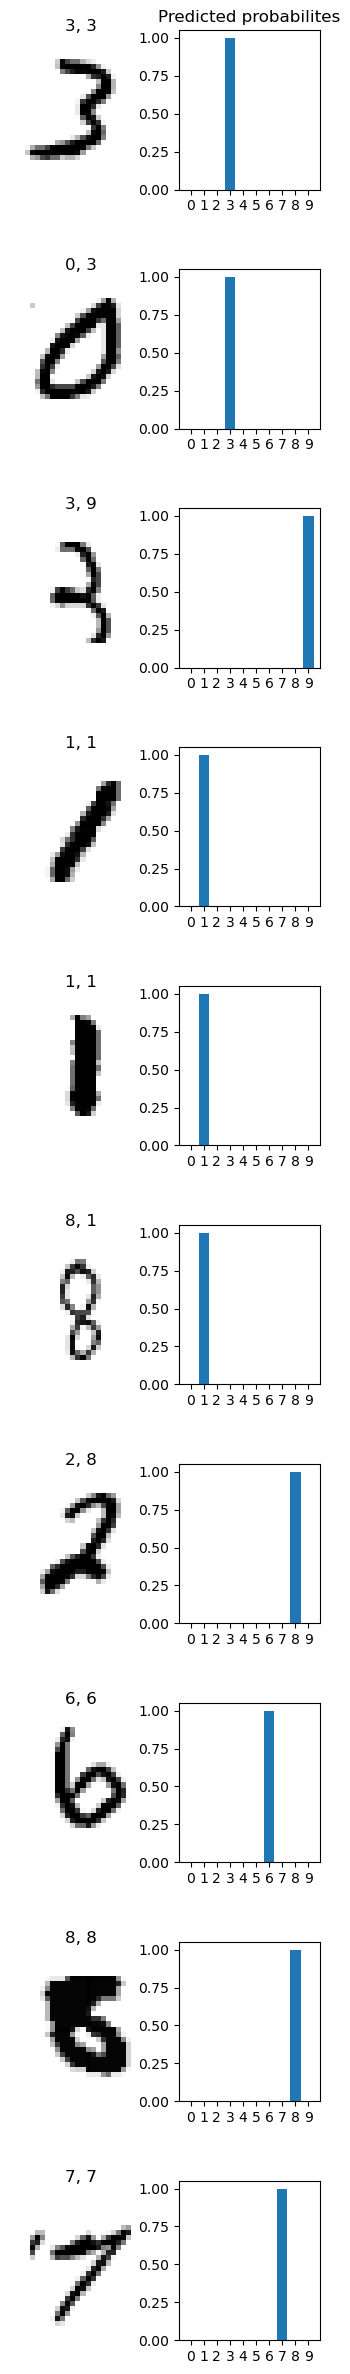

In [30]:
y_predP_gnb=nbModel.predict_proba(X_test_mnist)
m1=10
ran1=np.random.randint(0,X_test_mnist.shape[0], m1)

fig1, ax1 = plt.subplots(m1,2)
fig1.set_size_inches(4,3*m1)
plt.subplots_adjust(hspace=0.5)
for i in range(m1):
    ax1[i,0].imshow(np.array(X_test_mnist.iloc[ran1[i]].iloc[:784]).reshape((28,28)),cmap='binary')
    ax1[i,0].axis('off')
    ax1[i,0].set_title(f"{y_test_mnist.iloc[ran1[i]]}, {y_pred_gnb[ran1[i]]}")
    ax1[i,1].bar(height=y_predP_gnb[ran1[i]],x=range(10))
    ax1[i,1].set_xticks(range(10))
ax1[0,1].set_title('Predicted probabilites')
  

## Class distribution of pixels: Categorical
We assume that the distribution is categorical: each pixel belongs toone of 256 classes. Probabilities ae estimated by sample proportion:

In [33]:
cnb = skb.CategoricalNB(min_categories=256)

cnb.fit(X_train_mnist, y_train_mnist)

y_pred_cnb=cnb.predict(X_test_mnist)
y_predP_cnb=cnb.predict_proba(X_test_mnist)

Number of mislabeled points out of a total 8000 points : 1479
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       764
           1       0.75      0.99      0.85       897
           2       0.88      0.77      0.82       814
           3       0.76      0.78      0.77       857
           4       0.78      0.77      0.78       749
           5       0.81      0.65      0.72       747
           6       0.86      0.89      0.88       790
           7       0.92      0.85      0.88       819
           8       0.82      0.71      0.76       772
           9       0.72      0.83      0.77       791

    accuracy                           0.82      8000
   macro avg       0.82      0.81      0.81      8000
weighted avg       0.82      0.82      0.81      8000

The confusion matrix for Categorical Model NB:
 [[676   1   5   4   4  37  22   0  13   2]
 [  0 885   2   1   1   3   2   1   1   1]
 [ 11  43 624  17  25   4  47  11  24   8]
 [

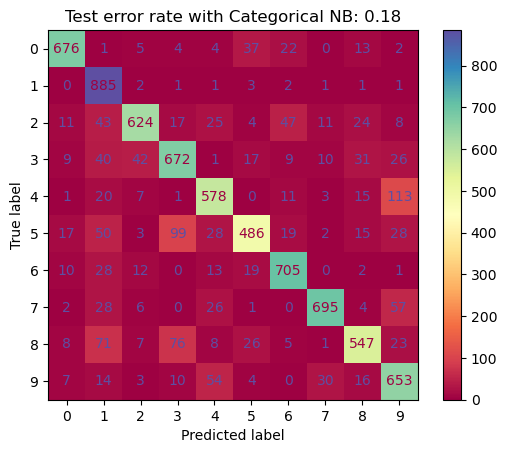

Error rate with Categorical NB: 0.18


In [35]:
print(f"Number of mislabeled points out of a total {X_test_mnist.shape[0]} points : {(y_test_mnist != y_pred_cnb).sum()}")
C_cnb=confusion_matrix(y_test_mnist, y_pred_cnb)
print(classification_report(y_test_mnist,y_pred_cnb))
print("The confusion matrix for Categorical Model NB:\n", C_cnb)
errRate_cnb=1.-sum(np.diag(C_cnb))/C_cnb.sum()
#sns.heatmap(C, cmap="Spectral")
ConfusionMatrixDisplay(C_cnb).plot(cmap="Spectral")
plt.title(f"Test error rate with Categorical NB: {errRate_cnb:.2f}")
plt.show()

print(f"Error rate with Categorical NB: {errRate_cnb:.2f}")


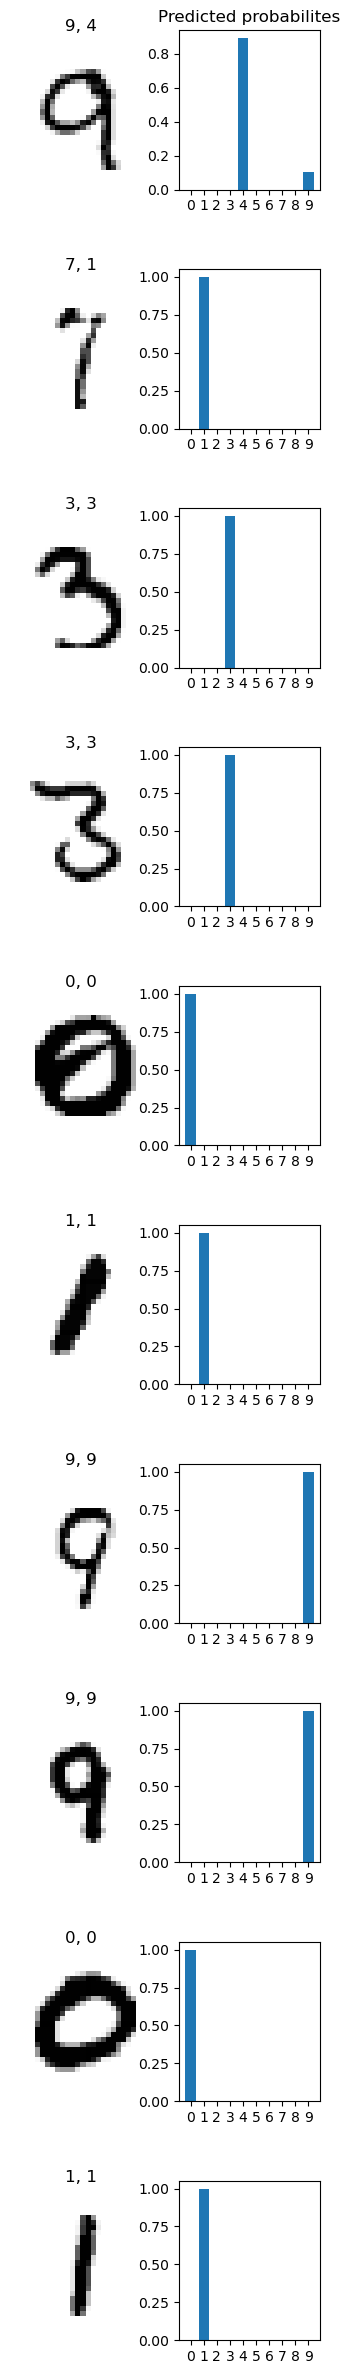

In [27]:
m2=10
ran2=np.random.randint(0,X_test_mnist.shape[0], m2)

fig2, ax2 = plt.subplots(m2,2)
fig2.set_size_inches(4,3*m2)
plt.subplots_adjust(hspace=0.5)
ax2[0,1].set_title('Predicted probabilites')
for i in range(m2):
    ax2[i,0].imshow(np.array(X_test_mnist.iloc[ran2[i]].iloc[:784]).reshape((28,28)),cmap='binary')
    ax2[i,0].axis('off')
    ax2[i,0].set_title(f"{y_test_mnist.iloc[ran2[i]]}, {y_pred_cnb[ran2[i]]}")
    ax2[i,1].bar(height=y_predP_cnb[ran2[i]],x=range(10))
    ax2[i,1].set_xticks(range(10))


In [37]:
bnb = skb.BernoulliNB()

bnb.fit(X_train_mnist, y_train_mnist)

y_pred_bnb=bnb.predict(X_test_mnist)
y_predP_bnb=bnb.predict_proba(X_test_mnist)

Number of mislabeled points out of a total 8000 points : 1345
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       764
           1       0.86      0.97      0.91       897
           2       0.87      0.82      0.85       814
           3       0.76      0.80      0.78       857
           4       0.80      0.77      0.78       749
           5       0.83      0.71      0.76       747
           6       0.87      0.90      0.88       790
           7       0.94      0.85      0.89       819
           8       0.77      0.76      0.76       772
           9       0.74      0.83      0.78       791

    accuracy                           0.83      8000
   macro avg       0.83      0.83      0.83      8000
weighted avg       0.83      0.83      0.83      8000

The confusion matrix for Categorical Model NB:
 [[686   1   3   5   3  32  18   0  15   1]
 [  0 869   3   1   1   8   4   1  10   0]
 [ 12  13 670  17  20   3  39   6  32   2]
 [

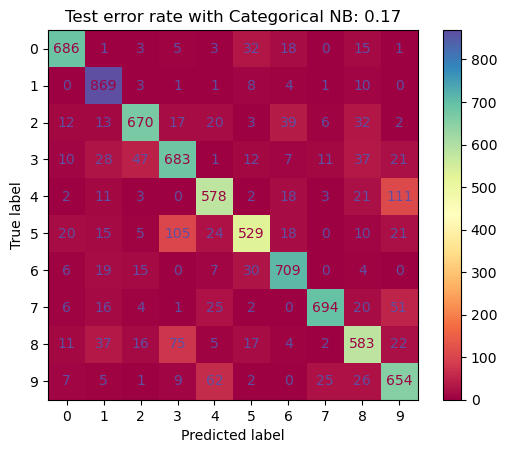

Error rate with Categorical NB: 0.17


In [40]:
print(f"Number of mislabeled points out of a total {X_test_mnist.shape[0]} points : {(y_test_mnist != y_pred_bnb).sum()}")
C_bnb=confusion_matrix(y_test_mnist, y_pred_bnb)
print(classification_report(y_test_mnist,y_pred_bnb))
print("The confusion matrix for Categorical Model NB:\n", C_bnb)
errRate_bnb=1.-sum(np.diag(C_bnb))/C_bnb.sum()
#sns.heatmap(C, cmap="Spectral")
ConfusionMatrixDisplay(C_bnb).plot(cmap="Spectral")
plt.title(f"Test error rate with Categorical NB: {errRate_bnb:.2f}")
plt.show()

print(f"Error rate with Categorical NB: {errRate_bnb:.2f}")


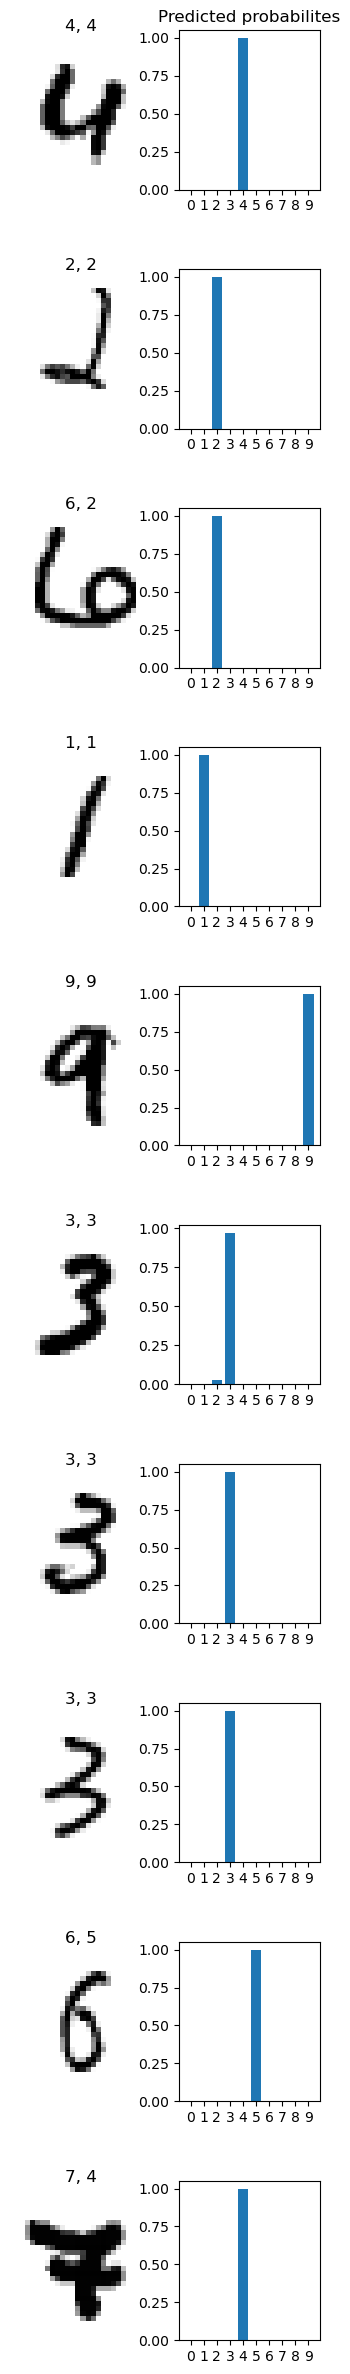

In [42]:
m3=10
ran3=np.random.randint(0,X_test_mnist.shape[0], m3)

fig3, ax3 = plt.subplots(m3,2)
fig3.set_size_inches(4,3*m3)
plt.subplots_adjust(hspace=0.5)
ax3[0,1].set_title('Predicted probabilites')
for i in range(m3):
    ax3[i,0].imshow(np.array(X_test_mnist.iloc[ran3[i]].iloc[:784]).reshape((28,28)),cmap='binary')
    ax3[i,0].axis('off')
    ax3[i,0].set_title(f"{y_test_mnist.iloc[ran3[i]]}, {y_pred_bnb[ran3[i]]}")
    ax3[i,1].bar(height=y_predP_bnb[ran3[i]],x=range(10))
    ax3[i,1].set_xticks(range(10))
